# **Minh họa ứng dụng mô hình phân lớp SVM**
####  *Support Vector Machine*
<hr>

### **Phụ lục:**
- ***1. Bài toán đặt ra***: Giới thiệu chủ đề quan tâm và bài toán chính.
- ***2. Tập dữ liệu thực nghiệm***: Giới thiệu tập dữ liệu dùng thực nghiệm, phân bố.
- ***3. Rút trích đặc trưng***: Thực hiện rút trích đặc trưng.
- ***4. Mô hình phân lớp***: Xây dựng mô hình SVM phân lớp dữ liệu.
- ***5. Cơ bản về sự hội tụ***: Đánh giá trên các mô hình ước lượng.

#### ***Khai báo các thư viện cần thiết:***

In [2]:
import pandas as pd
import joblib as jb
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import local_binary_pattern as LBP

import dlib
import cv2
from skimage.feature import local_binary_pattern as LBP
from PIL import ImageFont, ImageDraw, Image
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

# **1. Bài toán đặt ra:**
<hr></hr>

# **2. Giới thiệu tập dữ liệu:**
<hr></hr>

In [3]:
x_train=np.load('Data/numpy/train_bin.npy',allow_pickle=True)
y_train_gender=np.load('Data/numpy/train_gender_label.npy')
y_train_age=np.load('Data/numpy/train_age_label.npy')

x_val=np.load('Data/numpy/val_bin.npy',allow_pickle=True)
y_val_gender=np.load('Data/numpy/val_gender_label.npy')
y_val_age=np.load('Data/numpy/val_age_label.npy')

x_test=np.load('Data/numpy/test_bin.npy',allow_pickle=True)
y_test_gender=np.load('Data/numpy/test_gender_label.npy')
y_test_age=np.load('Data/numpy/test_age_label.npy')

In [4]:
print(x_train.shape,y_train_gender.shape)
print(x_val.shape,y_val_gender.shape)
print(x_test.shape,y_test_gender.shape)

(13785, 4096) (13785,)
(4309, 4096) (4309,)
(3447, 4096) (3447,)


Text(0.5, 1.0, 'Gender1')

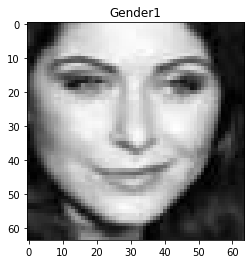

In [5]:
plt.imshow(x_train[1000].reshape(64,64),cmap='gray')
plt.title('Gender'+str(y_train_gender[1000]))

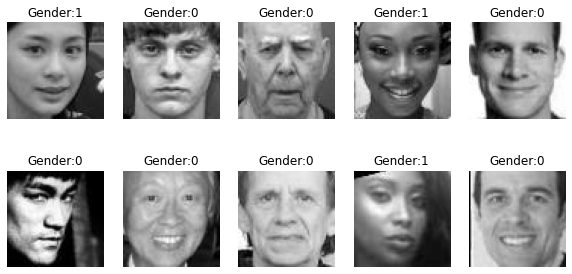

In [6]:
idx=200
image_sample_pca=[]
fig = plt.figure(figsize=(10,10))

for i in range(5):
    fig.add_subplot(1, 5,i+1)
    img_pca_show=(x_train[idx+i]).reshape(64,64)
    plt.imshow(img_pca_show,cmap='gray')
    plt.title('Gender:'+str(y_train_gender[idx+i]))
    plt.axis('off')
    
for i in range(5,10):
    fig.add_subplot(2, 5,i+1)
    img_pca_show=(x_train[idx+i]).reshape(64,64)
    plt.imshow(img_pca_show,cmap='gray')
    plt.title('Gender:'+str(y_train_gender[idx+i]))
    plt.axis('off')

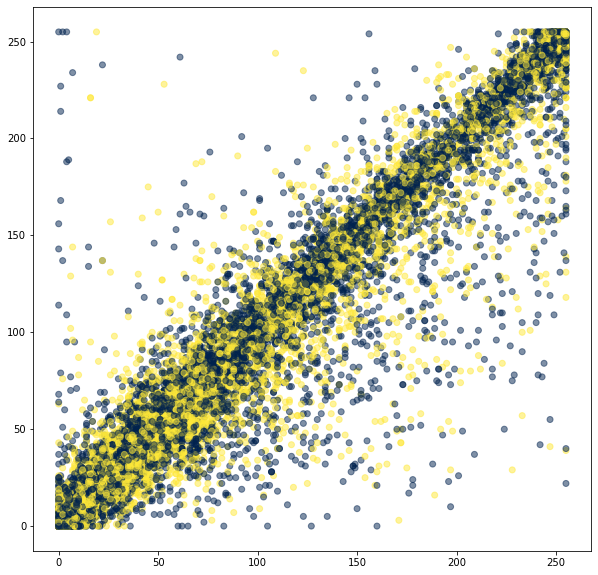

In [7]:
plt.figure(1, figsize=(10,10))
scatter = plt.scatter(x_train[:,0], x_train[:, 1], c=y_train_gender, alpha=0.5,cmap='cividis')
elems = list(scatter.legend_elements())

# **3. Thực hiện rút trích đặc trưng:**
<hr></hr>

### ***Principal Component Analysis (PCA)***
#### *Karhunen Lòeve*

k-dim=199
k-dim=78
k-dim=11
k-dim=4
k-dim=3
k-dim=2
k-dim=1


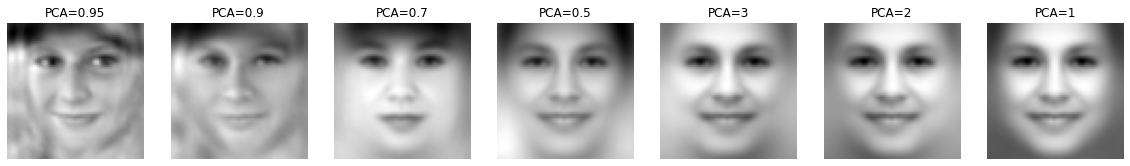

In [5]:
n_comp=[0.95,0.9,0.7,0.5,3,2,1]
i=1
fig = plt.figure(figsize=(20,15))

for n in n_comp:
    pca=PCA(n_components=n)
    x_train_pca=pca.fit_transform(x_train)
    
    print('k-dim={}'.format(x_train_pca.shape[1]))
    idx=50
    cm='gray'
    fig.add_subplot(1, 7,i)
    img_pca_show=pca.inverse_transform(x_train_pca[idx]).reshape(64,64)
    plt.imshow(img_pca_show,cmap=cm)
    plt.title('PCA={}'.format(n),size=(12))
    plt.axis('off')
    i+=1

In [8]:
#pca=PCA(n_components=2)
pca=jb.load('Data/model/pca.joblib')

In [4]:
x_train_pca=pca.transform(x_train)

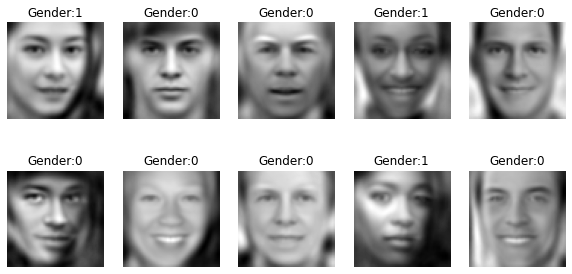

In [25]:
idx=200
cm='gray'
image_sample_pca=[]
fig = plt.figure(figsize=(10,10))

for i in range(5):
    fig.add_subplot(1, 5,i+1)
    img_pca_show=pca.inverse_transform(x_train_pca[idx+i]).reshape(64,64)
    plt.imshow(img_pca_show,cmap=cm)
    plt.title('Gender:'+str(y_train_gender[idx+i]))
    plt.axis('off')
    
for i in range(5,10):
    fig.add_subplot(2, 5,i+1)
    img_pca_show=pca.inverse_transform(x_train_pca[idx+i]).reshape(64,64)
    plt.imshow(img_pca_show,cmap=cm)
    plt.title('Gender:'+str(y_train_gender[idx+i]))
    plt.axis('off')

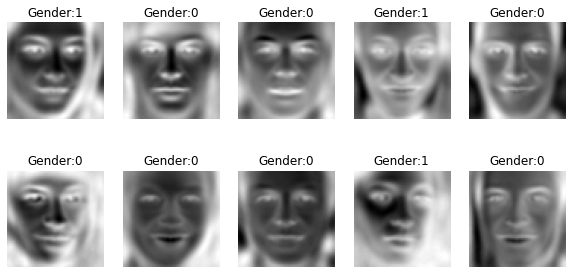

In [26]:
idx=200
cm='binary'
image_sample_pca=[]
fig = plt.figure(figsize=(10,10))

for i in range(5):
    fig.add_subplot(1, 5,i+1)
    img_pca_show=pca.inverse_transform(x_train_pca[idx+i]).reshape(64,64)
    plt.imshow(img_pca_show,cmap=cm)
    plt.title('Gender:'+str(y_train_gender[idx+i]))
    plt.axis('off')
    
for i in range(5,10):
    fig.add_subplot(2, 5,i+1)
    img_pca_show=pca.inverse_transform(x_train_pca[idx+i]).reshape(64,64)
    plt.imshow(img_pca_show,cmap=cm)
    plt.title('Gender:'+str(y_train_gender[idx+i]))
    plt.axis('off')

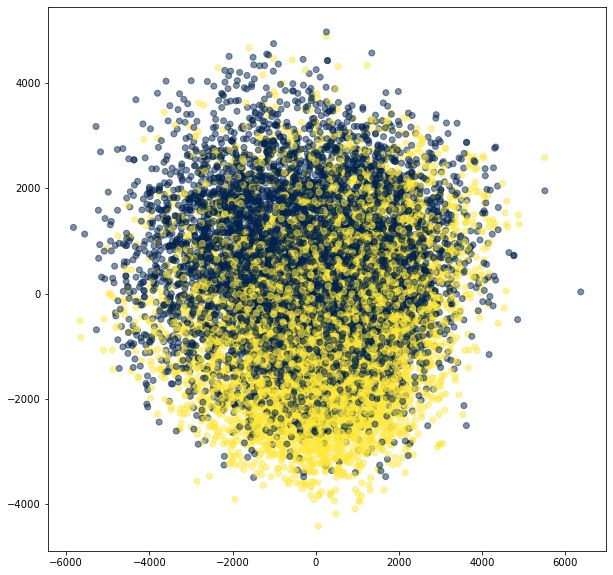

In [27]:
plt.figure(1, figsize=(10,10))
scatter = plt.scatter(x_train_pca[:,0], x_train_pca[:, 1], c=y_train_gender, alpha=0.5,cmap='cividis')
#elems = list(scatter.legend_elements())

In [5]:
x_val_pca=pca.transform(x_val)
x_test_pca=pca.transform(x_test)

# **4. Xây dựng mô hình phân lớp:**
<hr></hr>

In [13]:
c_para=[0.01,0.1,0.3,0.6,0.9,1,3,6,9,10,30,60,90,100]
acc_train=[]
acc_val=[]
loss_train=[]
loss_val=[]

In [14]:
for c in c_para:
    clf=SVC(C=c)
    clf.fit(x_train_pca,y_train_gender)
    
    acc_t=clf.score(x_train_pca,y_train_gender)
    acc_v=clf.score(x_val_pca,y_val_gender)
    
    acc_train.append(acc_t)
    acc_val.append(acc_v)
    
    y_pred_train=clf.predict(x_train_pca)
    y_pred_val=clf.predict(x_val_pca)
    
    loss_t=np.mean(y_pred_train!=y_train_gender)
    loss_v=np.mean(y_pred_val!=y_val_gender)
    
    loss_train.append(loss_t)
    loss_val.append(loss_v)
    
    print('INFO: Fit SVM with C={} done!'.format(c))

INFO: Fit SVM with C=0.01 done!
INFO: Fit SVM with C=0.1 done!
INFO: Fit SVM with C=0.3 done!
INFO: Fit SVM with C=0.6 done!
INFO: Fit SVM with C=0.9 done!
INFO: Fit SVM with C=1 done!
INFO: Fit SVM with C=3 done!
INFO: Fit SVM with C=6 done!
INFO: Fit SVM with C=9 done!
INFO: Fit SVM with C=10 done!
INFO: Fit SVM with C=30 done!
INFO: Fit SVM with C=60 done!
INFO: Fit SVM with C=90 done!
INFO: Fit SVM with C=100 done!


In [20]:
df_acc=pd.DataFrame(data=zip(c_para,acc_train,acc_val,loss_train,loss_val),columns=['C','Acc train (%)','Acc val (%)','Loss train','Loss val'])
df_acc

C  Acc train (%)  Acc val (%)  Loss train  Loss val
0     0.01       0.740588     0.748201    0.259412  0.251799
1     0.10       0.848676     0.844279    0.151324  0.155721
2     0.30       0.887341     0.868879    0.112659  0.131121
3     0.60       0.907145     0.880483    0.092855  0.119517
4     0.90       0.919333     0.884196    0.080667  0.115804
5     1.00       0.921727     0.884892    0.078273  0.115108
6     3.00       0.951106     0.887213    0.048894  0.112787
7     6.00       0.972071     0.884428    0.027929  0.115572
8     9.00       0.983025     0.884428    0.016975  0.115572
9    10.00       0.984403     0.882803    0.015597  0.117197
10   30.00       0.997751     0.873985    0.002249  0.126015
11   60.00       0.998839     0.867719    0.001161  0.132281
12   90.00       0.998984     0.867951    0.001016  0.132049
13  100.00       0.998984     0.867951    0.001016  0.132049

# **5. Cơ bản về sự hội tụ:**
<hr></hr>

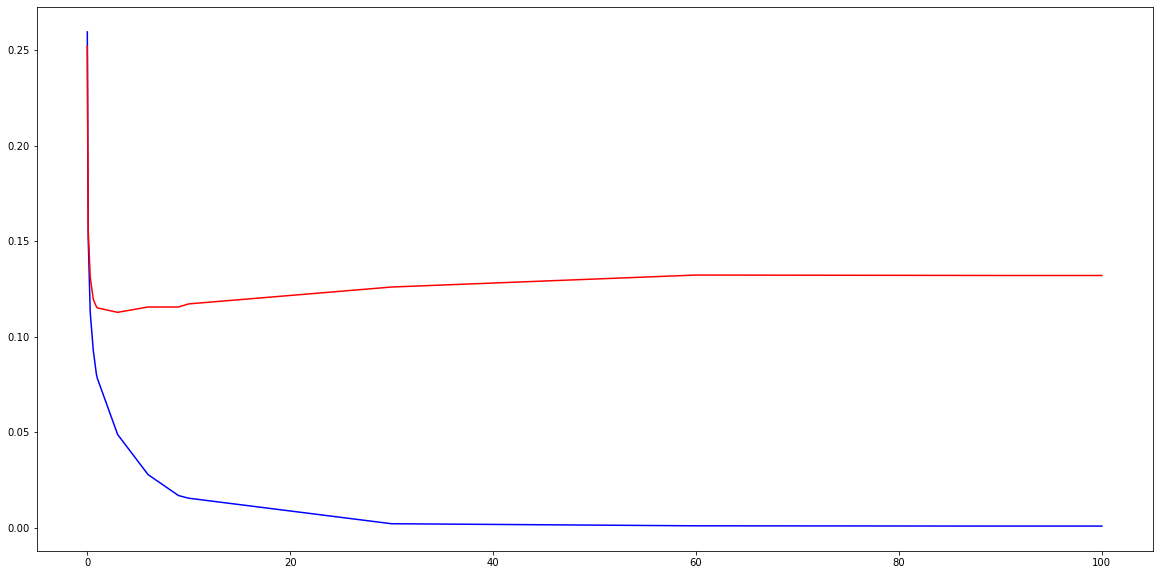

In [15]:
plt.figure(figsize=(20,10))
plt.plot(c_para,loss_train,color='blue',label='Acc train')
plt.plot(c_para,loss_val,color='red',label='Acc validation')

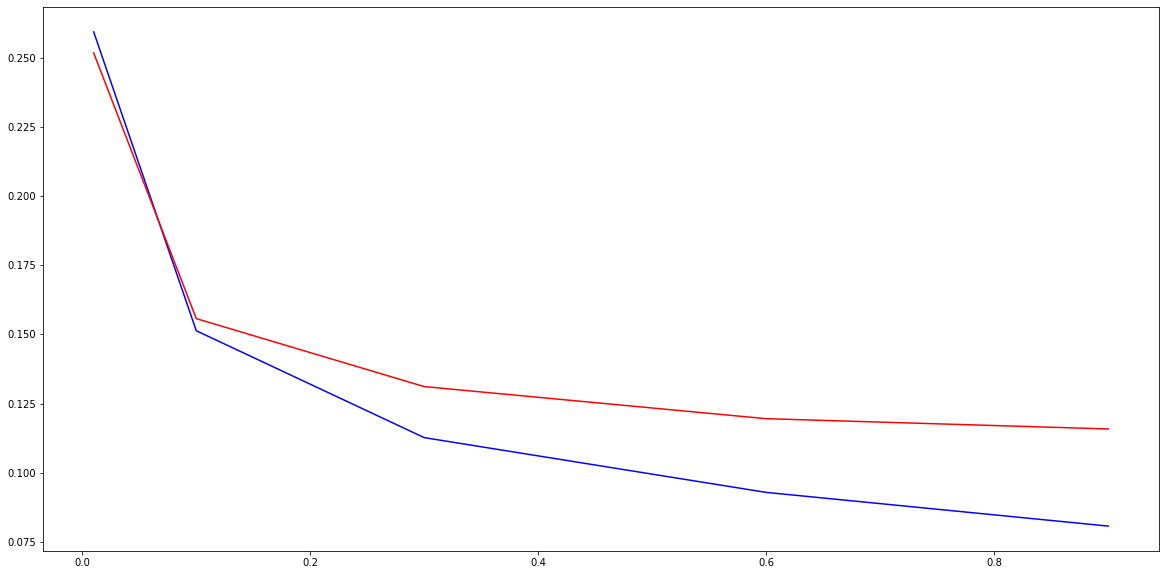

In [16]:
plt.figure(figsize=(20,10))
plt.plot(np.reshape(c_para,-1)[:5],np.reshape(loss_train,-1)[:5],color='blue',label='Acc train')
plt.plot(np.reshape(c_para,-1)[:5],np.reshape(loss_val,-1)[:5],color='red',label='Acc validation')

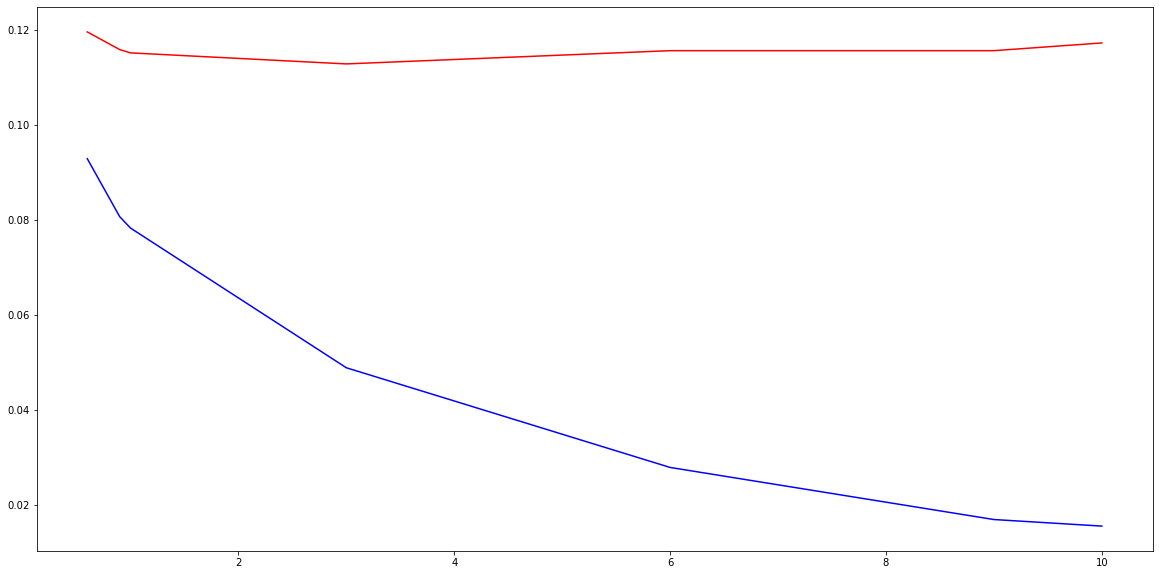

In [17]:
plt.figure(figsize=(20,10))
plt.plot(np.reshape(c_para,-1)[3:10],np.reshape(loss_train,-1)[3:10],color='blue',label='Acc train')
plt.plot(np.reshape(c_para,-1)[3:10],np.reshape(loss_val,-1)[3:10],color='red',label='Acc validation')

In [13]:
model=jb.load('Data/model/svm.joblib')
model.get_params()

{'C': 3,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [6]:
#model=SVC(C=3)
#model.fit(x_train_pca,y_train_gender)

SVC(C=3)

In [7]:
print('Accuray on test data: {}'.format(np.round(model.score(x_train_pca,y_train_gender)*100,2)))
print('Accuray on test data: {}'.format(np.round(model.score(x_val_pca,y_val_gender)*100,2)))
print('Accuray on test data: {}'.format(np.round(model.score(x_test_pca,y_test_gender)*100,2)))

Accuray on test data: 95.11
Accuray on test data: 88.72
Accuray on test data: 88.42


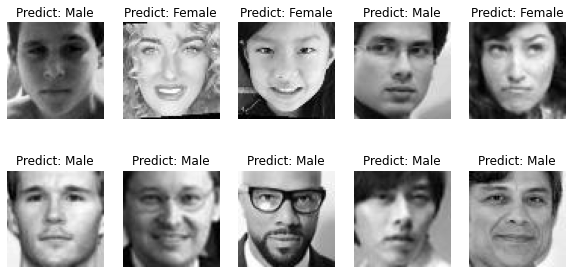

In [32]:
idx=np.random.randint(len(x_test))
cm='gray'
image_sample_pca=[]
fig = plt.figure(figsize=(10,10))

for i in range(5):
    fig.add_subplot(1, 5,i+1)
    img_pca_show=(x_test[idx+i]).reshape(64,64)
    plt.imshow(img_pca_show,cmap=cm)
    plt.title('Predict: {}'.format('Male' if (model.predict(x_test_pca[idx+i].reshape(1,-1)))==0 else 'Female'))
    plt.axis('off')
    
for i in range(5,10):
    fig.add_subplot(2, 5,i+1)
    img_pca_show=(x_test[idx+i]).reshape(64,64)
    plt.imshow(img_pca_show,cmap=cm)
    plt.title('Predict: {}'.format('Male' if (model.predict(x_test_pca[idx+i].reshape(1,-1)))==0 else 'Female'))
    plt.axis('off')

Text(0.5, 1.0, 'SVM Decision Region Boundary')

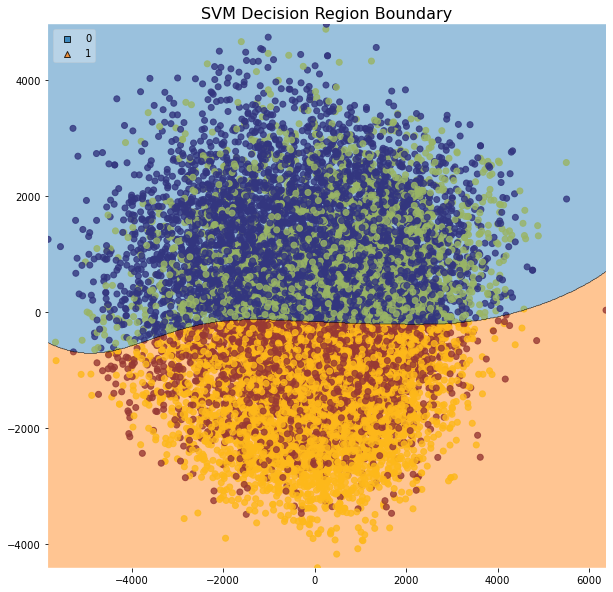

In [29]:
value=1.5
width=0.75
f_v=[]
f_w=[]
v=[]
w=[]
for i in range(2,78):
    f_v.append(i)
    f_w.append(i)
    v.append(value)
    w.append(width)
    
v_dict=dict(zip(f_v,v))
w_dict=dict(zip(f_w,w))

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_train_pca[:,0], x_train_pca[:, 1], c=y_train_gender, alpha=0.8,marker='o')
plot_decision_regions(X=x_train_pca, 
                      y=y_train_gender,
                      clf=model,
                      feature_index=[0,1],
                      filler_feature_values=v_dict,
                      filler_feature_ranges=w_dict,
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.title('SVM Decision Region Boundary', size=16)

# **Demo:**
<hr></hr>

In [78]:
def AgeDetection(image,model,detector):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dets = detector(gray, 0)  #Xác định vị trí khuôn mặt trong bức ảnh    
    
    #Vẽ khung detect khuôn mặt 
    for rect in dets:
        x = rect.left()
        y = rect.top()
        w = rect.right()
        h = rect.bottom()
        cv2.rectangle(image, (x, y), (w, h), (0, 255, 0), 2)
        
        roi=gray[y:h,x:w]
        roi=cv2.resize(roi,(64,64))
        vector=roi.reshape(64*64)
        feature=pca.transform(vector.reshape(1,-1))
        
        gender=('Male' if model.predict(feature.reshape(1,-1))==0 else 'Female')
        cv2.putText(image,gender,(x,y-10),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,0,255),2)
        
    return image

In [41]:
detector = dlib.get_frontal_face_detector() 

(-0.5, 1299.5, 610.5, -0.5)

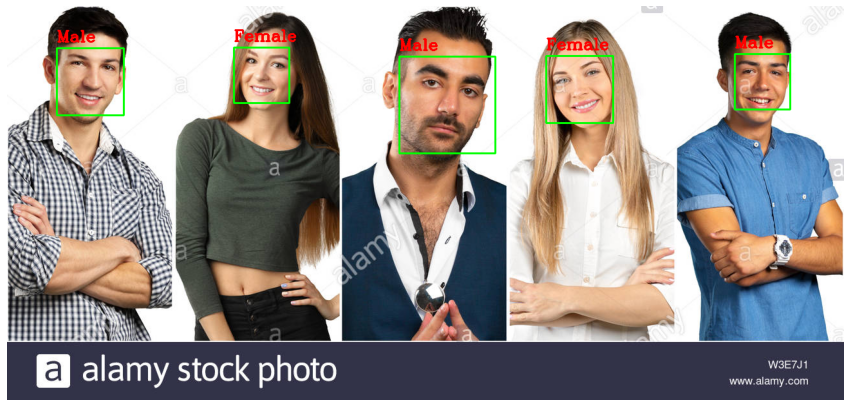

In [79]:
image=cv2.imread('demo3.jpg')
p_img=AgeDetection(image,model,detector)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(p_img,cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

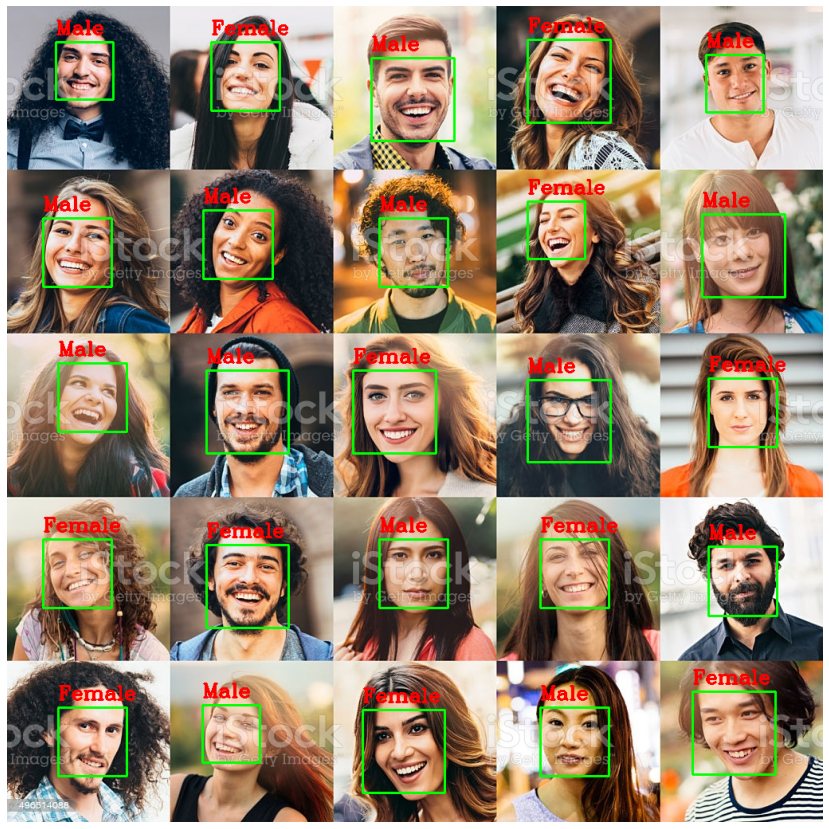

In [80]:
image=cv2.imread('demo4.jpg')
p_img=AgeDetection(image,model,detector)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(p_img,cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 789.5, 524.5, -0.5)

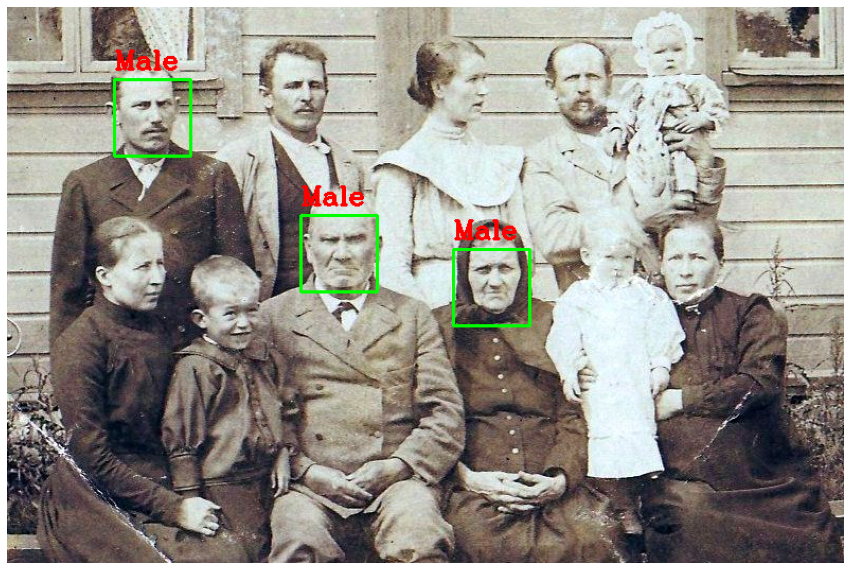

In [95]:
image=cv2.imread('demo7.jpg')
p_img=AgeDetection(image,model,detector)

plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(p_img,cv2.COLOR_BGR2RGB))
plt.axis('off')